In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [40]:
# Read the csv file into a pandas DataFrame
teamrecords = pd.read_csv('teamrecords.csv')
teamrecords.head()

,Rank,League,Team,Year,Wins,Losses,Win%
0,1,AL,SEA,2001,116,46,0.716
1,2,AL,OAK,2001,102,60,0.630
2,3,AL,NYY,2001,95,65,0.594
3,4,NL,HOU,2001,93,69,0.574
4,5,NL,STL,2001,93,69,0.574


In [41]:
# remove 2020 for being irregular
teamrecords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    600 non-null    int64  
 1   League  600 non-null    object 
 2   Team    600 non-null    object 
 3   Year    600 non-null    int64  
 4   Wins    600 non-null    int64  
 5   Losses  600 non-null    int64  
 6   Win%    600 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 32.9+ KB


In [42]:
teamrecords.drop(teamrecords[teamrecords["Year"]==2020].index, inplace=True)

In [43]:
teamrecords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 569
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    570 non-null    int64  
 1   League  570 non-null    object 
 2   Team    570 non-null    object 
 3   Year    570 non-null    int64  
 4   Wins    570 non-null    int64  
 5   Losses  570 non-null    int64  
 6   Win%    570 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 35.6+ KB


In [44]:
# Assign the data to X and y
X = teamrecords["Win%"].values.reshape(-1,1)
y = teamrecords["Rank"].values.reshape(-1,1)

print("Shape: ", X.shape, y.shape)

Shape:  (570, 1) (570, 1)


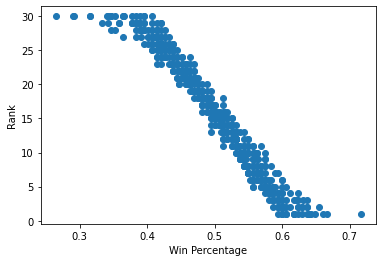

In [128]:
#show data in graph
plt.scatter(X, y)
plt.xlabel("Win Percentage")
plt.ylabel("Rank")
plt.savefig("Graphs/AllWinPercentage.png")

In [46]:
#split into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)

In [47]:
#use linear regression on model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [48]:
#fit model
model.fit(X_train, y_train)

LinearRegression()

In [49]:
#find rsquared and mse
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X_test)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 5.24779882802474
R-squared (R2 ): 0.9330936879352448


In [50]:
#find model accuracy
model.score(X_test, y_test)

0.9330936879352448

In [51]:
#find line measures y = mx +b
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
#y = -115.1423x + 73.0277

Weight coefficients:  [[-115.14231747]]
y-axis intercept:  [73.02774113]


In [52]:
#find min and max values of x
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.265]]
Max X Value: [[0.716]]


In [53]:
#predict y mins and maxes given line
y_min = model.predict(x_min)
y_max = model.predict(x_max)

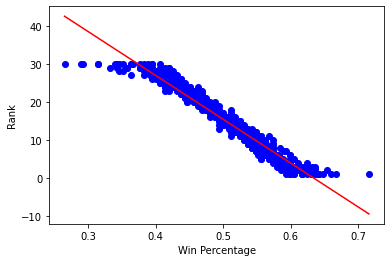

In [129]:
#plot the fit line
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.xlabel("Win Percentage")
plt.ylabel("Rank")
plt.savefig("Graphs/AllWinPercentageLine.png")

In [55]:
#Is there a difference between AL and NL over the years?
ALwinrate = teamrecords[teamrecords["League"]=="AL"]
ALwinrate

,Rank,League,Team,Year,Wins,Losses,Win%
0,1,AL,SEA,2001,116,46,0.716
1,2,AL,OAK,2001,102,60,0.630
2,3,AL,NYY,2001,95,65,0.594
6,7,AL,CLE,2001,91,71,0.562
12,13,AL,MIN,2001,85,77,0.525
...,...,...,...,...,...,...,...
564,25,AL,SEA,2019,68,94,0.420
565,26,AL,TOR,2019,67,95,0.414
566,27,AL,KCR,2019,59,103,0.364
568,29,AL,BAL,2019,54,108,0.333


In [56]:
# Assign the data to X and y
ALX = ALwinrate["Win%"].values.reshape(-1,1)
ALy = ALwinrate["Rank"].values.reshape(-1,1)

print("Shape: ", ALX.shape, ALy.shape)

Shape:  (273, 1) (273, 1)


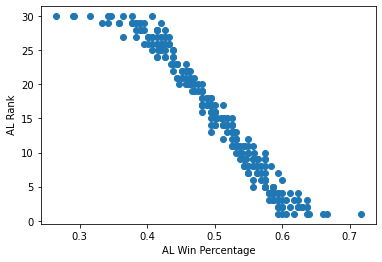

In [126]:
#show data in graph
plt.scatter(ALX, ALy)
plt.xlabel("AL Win Percentage")
plt.ylabel(" AL Rank")
plt.savefig("Graphs/ALWinPercentage.png")

In [58]:
#split into training and testing data

ALX_train, ALX_test, ALy_train, ALy_test = train_test_split(ALX, ALy, random_state=33)

In [59]:
ALmodel = LinearRegression()
#fit model
ALmodel.fit(ALX_train, ALy_train)

LinearRegression()

In [71]:
ALpredicted = ALmodel.predict(ALX_test)
ALmse = mean_squared_error(ALy_test, ALpredicted)
ALr2 = r2_score(ALy_test, ALpredicted)
print(f"AL Mean Squared Error (MSE): {ALmse}")
print(f"AL R-squared (R2 ): {ALr2}")

AL Mean Squared Error (MSE): 3.8613287103272222
AL R-squared (R2 ): 0.9511472297045842


In [72]:
#find model accuracy
ALmodel.score(ALX_test, ALy_test)

0.9511472297045842

In [73]:
NLwinrate = teamrecords[teamrecords["League"]=="NL"]
NLwinrate

,Rank,League,Team,Year,Wins,Losses,Win%
3,4,NL,HOU,2001,93,69,0.574
4,5,NL,STL,2001,93,69,0.574
5,6,NL,ARI,2001,92,70,0.568
7,8,NL,SFG,2001,90,72,0.556
8,9,NL,ATL,2001,88,74,0.543
...,...,...,...,...,...,...,...
558,19,NL,CIN,2019,75,87,0.463
561,22,NL,COL,2019,71,91,0.438
562,23,NL,SDP,2019,70,92,0.432
563,24,NL,PIT,2019,69,93,0.426


In [75]:
# Assign the data to X and y
NLX = NLwinrate["Win%"].values.reshape(-1,1)
NLy = NLwinrate["Rank"].values.reshape(-1,1)

print("Shape: ", NLX.shape, NLy.shape)

Shape:  (297, 1) (297, 1)


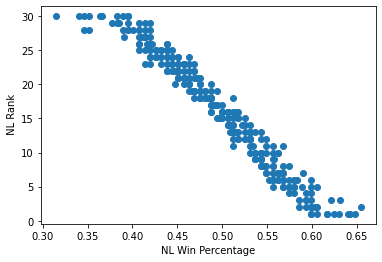

In [127]:
#show data in graph
plt.scatter(NLX, NLy)
plt.xlabel("NL Win Percentage")
plt.ylabel(" NL Rank")
plt.savefig("Graphs/NLWinPercentage.png")

In [77]:
#split into training and testing data

NLX_train, NLX_test, NLy_train, NLy_test = train_test_split(NLX, NLy, random_state=33)

In [66]:
NLmodel = LinearRegression()
#fit model
NLmodel.fit(NLX_train, NLy_train)

LinearRegression()

In [78]:
NLpredicted = NLmodel.predict(NLX_test)
NLmse = mean_squared_error(NLy_test, NLpredicted)
NLr2 = r2_score(NLy_test, NLpredicted)
print(f"NL Mean Squared Error (MSE): {NLmse}")
print(f"NL R-squared (R2 ): {NLr2}")

NL Mean Squared Error (MSE): 2.5843872632562954
NL R-squared (R2 ): 0.9616793240233009


In [79]:
#find model accuracy
NLmodel.score(NLX_test, NLy_test)

0.9616793240233009

In [69]:
#NL has higher accuracy.  Largest outliers on top end and bottom end were AL teams.  NL has lower mean square error.

In [80]:
#What are the predicted win percentage for the number 1 team in the league? The number 1 team if they are in the AL or NL? How does this change for all rankings?

In [81]:
#Find y lines for AL and NL
#find line measures y = mx +b
print('AL Weight coefficients: ', ALmodel.coef_)
print(' AL y-axis intercept: ', ALmodel.intercept_)
print('NL Weight coefficients: ', NLmodel.coef_)
print(' NL y-axis intercept: ', NLmodel.intercept_)
#AL line y = -109.2889x + 69.9834
#NL line y = -119.9241x + 75.5421
#both leagues y = -115.1423x + 73.0277

AL Weight coefficients:  [[-109.2889112]]
 AL y-axis intercept:  [69.9833566]
NL Weight coefficients:  [[-119.92411718]]
 NL y-axis intercept:  [75.54205928]


In [118]:
#solve for x for all 3 lines
#bothleaguesx = (y- 73.0277)/-115.1423
#alx = (y - 69.9834)/-109.2889
#nlx = (y - 75.5421)/-119.9241
ranks = []
bothleagueswinper = []
alwinper = []
nlwinper = []
for i in range(1,31):
    z = (i- 73.0277)/-115.1423
    z = round(z,4)
    bothleagueswinper.append(z)
    ranks.append(i)

In [119]:
print(len(bothleagueswinper))

30


In [120]:
for i in range(1,31):
    alz = (i - 69.9834)/-109.2889
    alz = round(alz,4)
    alwinper.append(alz)

In [121]:
for i in range(1,31):
    nlz = (i - 75.5421)/-119.9241
    nlz = round(nlz,4)
    nlwinper.append(nlz)

In [122]:
ranks

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

In [123]:
bothleagueswinper

[0.6256,
 0.6169,
 0.6082,
 0.5995,
 0.5908,
 0.5821,
 0.5734,
 0.5648,
 0.5561,
 0.5474,
 0.5387,
 0.53,
 0.5213,
 0.5126,
 0.504,
 0.4953,
 0.4866,
 0.4779,
 0.4692,
 0.4605,
 0.4519,
 0.4432,
 0.4345,
 0.4258,
 0.4171,
 0.4084,
 0.3997,
 0.3911,
 0.3824,
 0.3737]

In [130]:
print(alwinper)

[0.6312, 0.6221, 0.6129, 0.6038, 0.5946, 0.5855, 0.5763, 0.5672, 0.558, 0.5489, 0.5397, 0.5306, 0.5214, 0.5123, 0.5031, 0.494, 0.4848, 0.4757, 0.4665, 0.4574, 0.4482, 0.4391, 0.4299, 0.4208, 0.4116, 0.4025, 0.3933, 0.3842, 0.375, 0.3659]


In [131]:
print(nlwinper)

[0.6216, 0.6132, 0.6049, 0.5966, 0.5882, 0.5799, 0.5715, 0.5632, 0.5549, 0.5465, 0.5382, 0.5299, 0.5215, 0.5132, 0.5048, 0.4965, 0.4882, 0.4798, 0.4715, 0.4631, 0.4548, 0.4465, 0.4381, 0.4298, 0.4215, 0.4131, 0.4048, 0.3964, 0.3881, 0.3798]
